<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial Notebook</h1>




# 1.&nbsp;Installation


ImputeGAP is a comprehensive end-to-end imputation library that covers the whole imputation workflow, from data collection to explaining the results and their implications. It consists of two interconnected components: the imputation module and the advanced analysis module. These components can be used together through a standardized and configuration-based pipeline, or separately via independent instantiation. The documentation is available on: https://imputegap.readthedocs.io/

This notebook showcases key steps of the imputation: imputation pipeline synthesis and advanced analysis. Before getting started, please make sure to install the library along with the required Jupyter dependencies:

In [ ]:
%pip install imputegap==1.1.2

In [ ]:
%pip install -U ipywidgets

In [3]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

# 2.&nbsp;Dataset Handling

ImputeGAP comes with several time series datasets stored in the module `ts.datasets`. Those datasets contain real-world time series from various of applications and which cover a wide range of characteristics and sizes. All the publicly available datasets provided by the library can be listed using:

In [4]:
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

ts.datasets


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)



['airq',
 'bafu',
 'chlorine',
 'climate',
 'drift',
 'eeg-alcohol',
 'eeg-reading',
 'electricity',
 'forecast-economy',
 'meteo',
 'motion',
 'soccer',
 'sport-activity',
 'stock-exchange',
 'temperature',
 'traffic']

## 2.1&nbsp;Dataset Loading

The **EEG-Alcohol** dataset, owned by Henri Begleiter EEG dataset, is utilized in various studies such as Statistical mechanics of neocortical interactions: Canonical momenta indicatorsof electroencephalography. It describes an EEG database composed of individuals with a genetic predisposition to alcoholism. The dataset contains measurements from 64 electrodes placed on subject's scalps which were sampled at 256 Hz (3.9-msec epoch) for 1 second. The dataset contains a total of 416 samples. The specific subset used in ImputeGAP is the S2 match for trial 119, identified as co3a0000458.rd. The dataset's dimensions are 64 series, each containing 256 values. This dataset is primarily used for the analysis of medical and brain-related data, with a focus on detecting predictable patterns in brain wave activity.

<br>


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/eeg-alcohol.txt

> logs: normalization (z_score) of the data - runtime: 0.0006 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_14_imputegap_plot.jpg


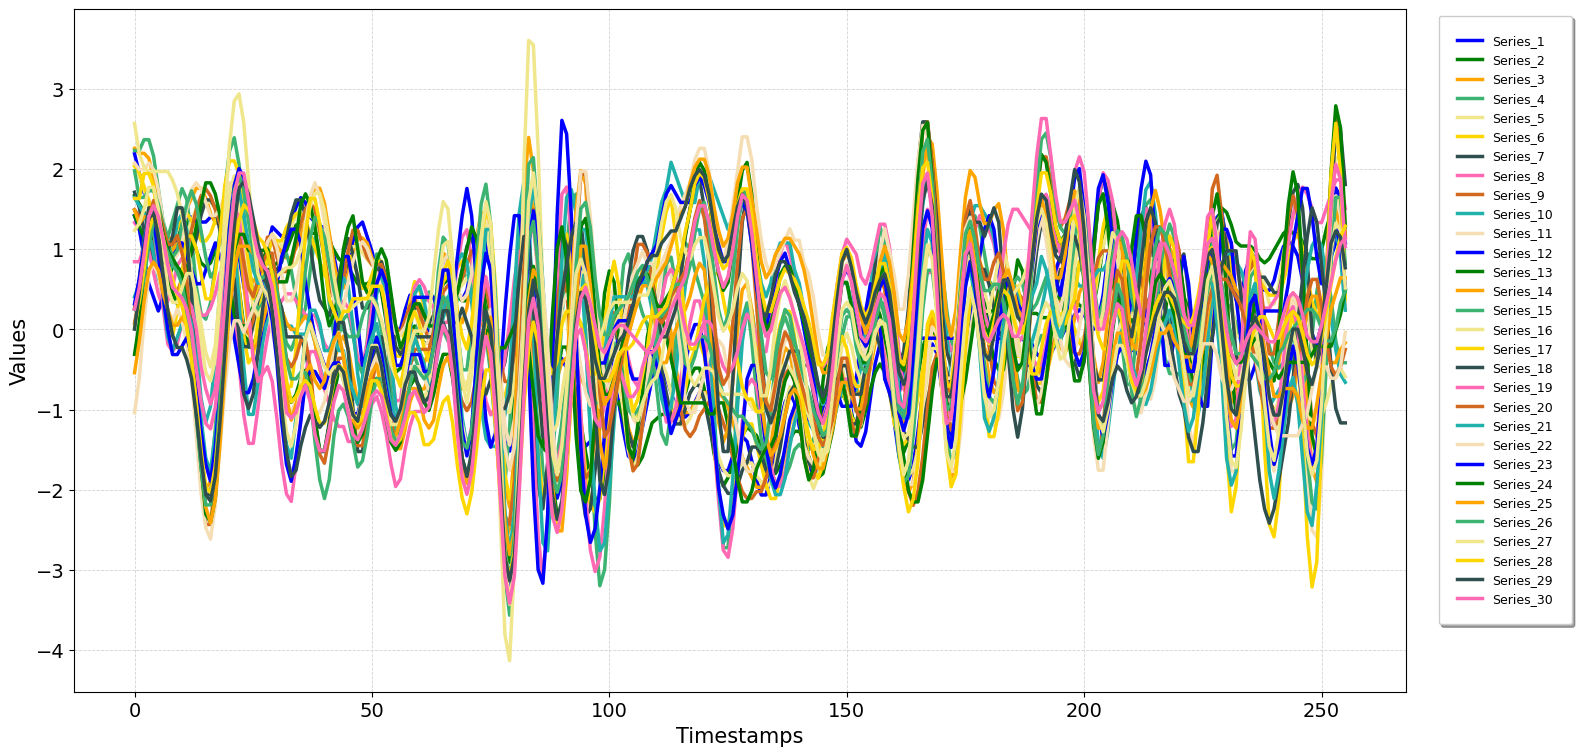

In [6]:
# load the dataset from the library
ts.load_series(utils.search_path("eeg-alcohol"))
ts.plot(input_data=ts.data, nbr_series=30, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

The **Electricity** dataset has data on household energy consumption of 370 individual clients collected every minute between 2006 and 2010 in France (obtained from the UCI repository).


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/electricity.txt

> logs: normalization (z_score) of the data - runtime: 0.0015 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_18_imputegap_plot.jpg


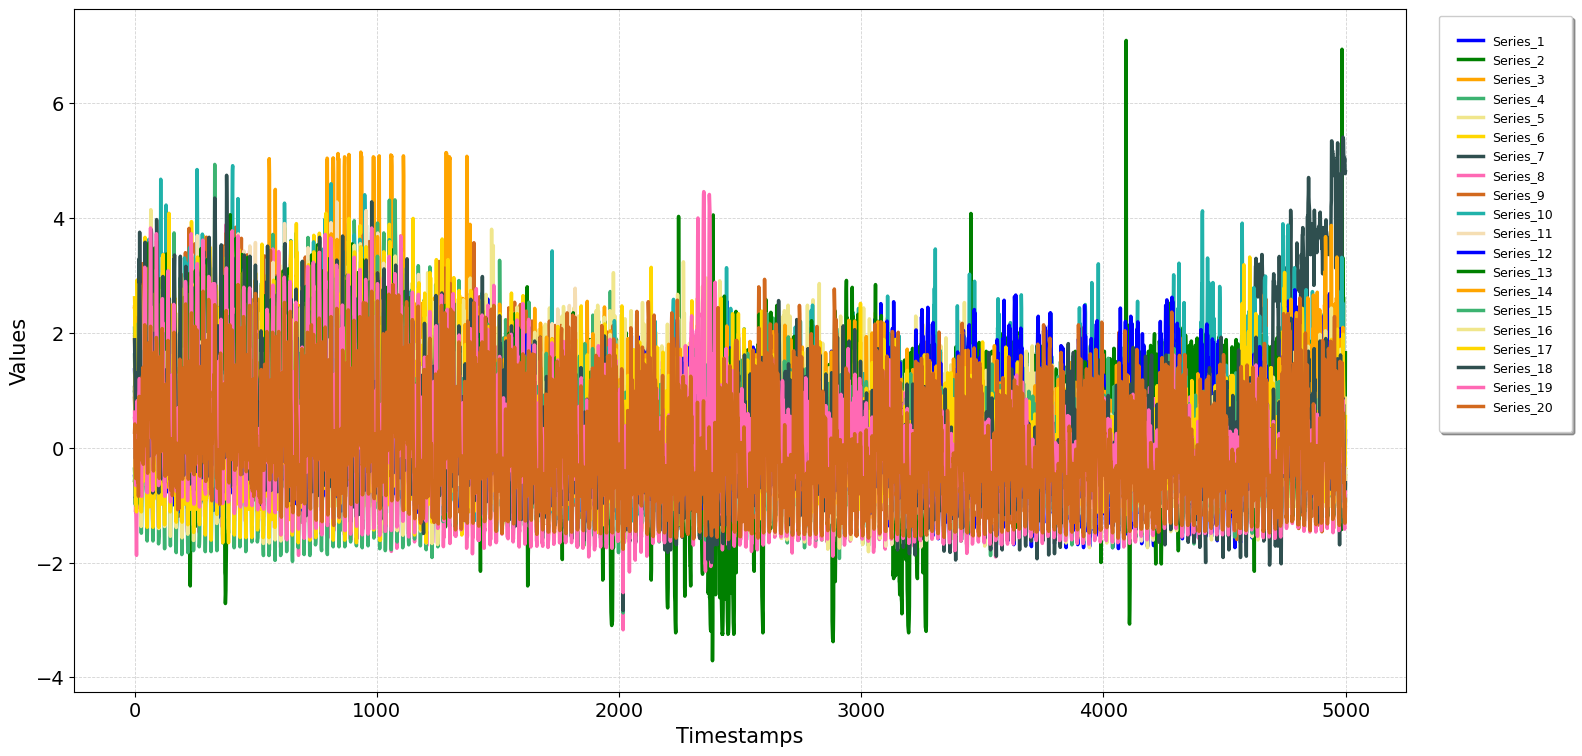

In [7]:
# load the dataset from the library
ts.load_series(utils.search_path("electricity"))
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

The **Soccer** dataset, initially presented in the DEBS Challenge 2013, captures player positions during a football match. The data is collected from sensors placed near players' shoes and the goalkeeper's hands. With a high tracking frequency of 200Hz, it generates 15,000 position events per second. Soccer time series exhibit bursty behavior and contain numerous outliers.


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/soccer.txt

> logs: normalization (z_score) of the data - runtime: 0.0230 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_23_imputegap_plot.jpg


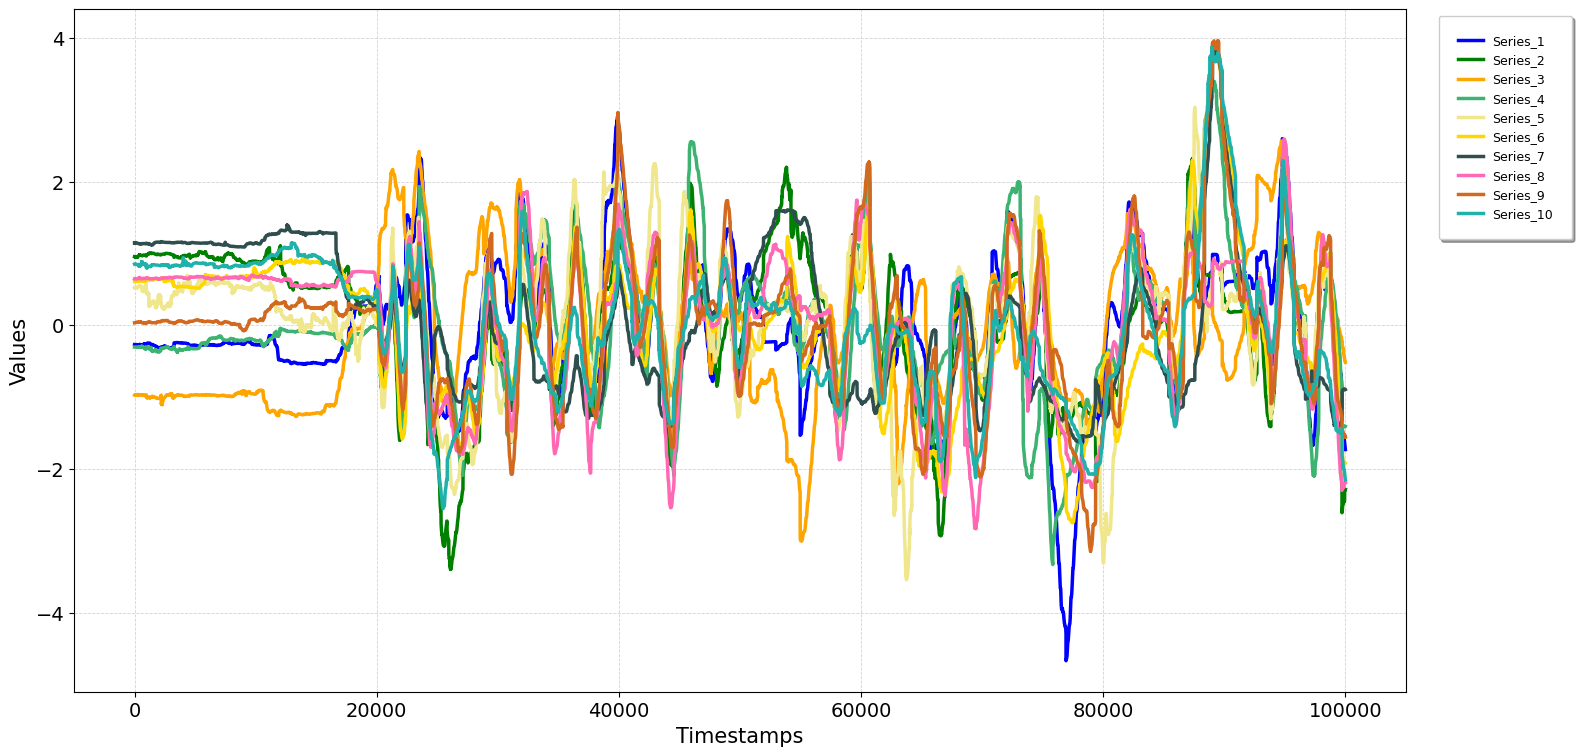

In [8]:
# load the dataset from the library
ts.load_series(utils.search_path("soccer"))
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

The **Stock-exchange** dataset contains collection of the daily exchange rates of eight foreign countries including Australia, British, Canada, Switzerland, China, Japan, New Zealand and Singapore ranging from 1990 to 2016.


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/stock-exchange.txt

> logs: normalization (z_score) of the data - runtime: 0.0016 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_27_imputegap_plot.jpg


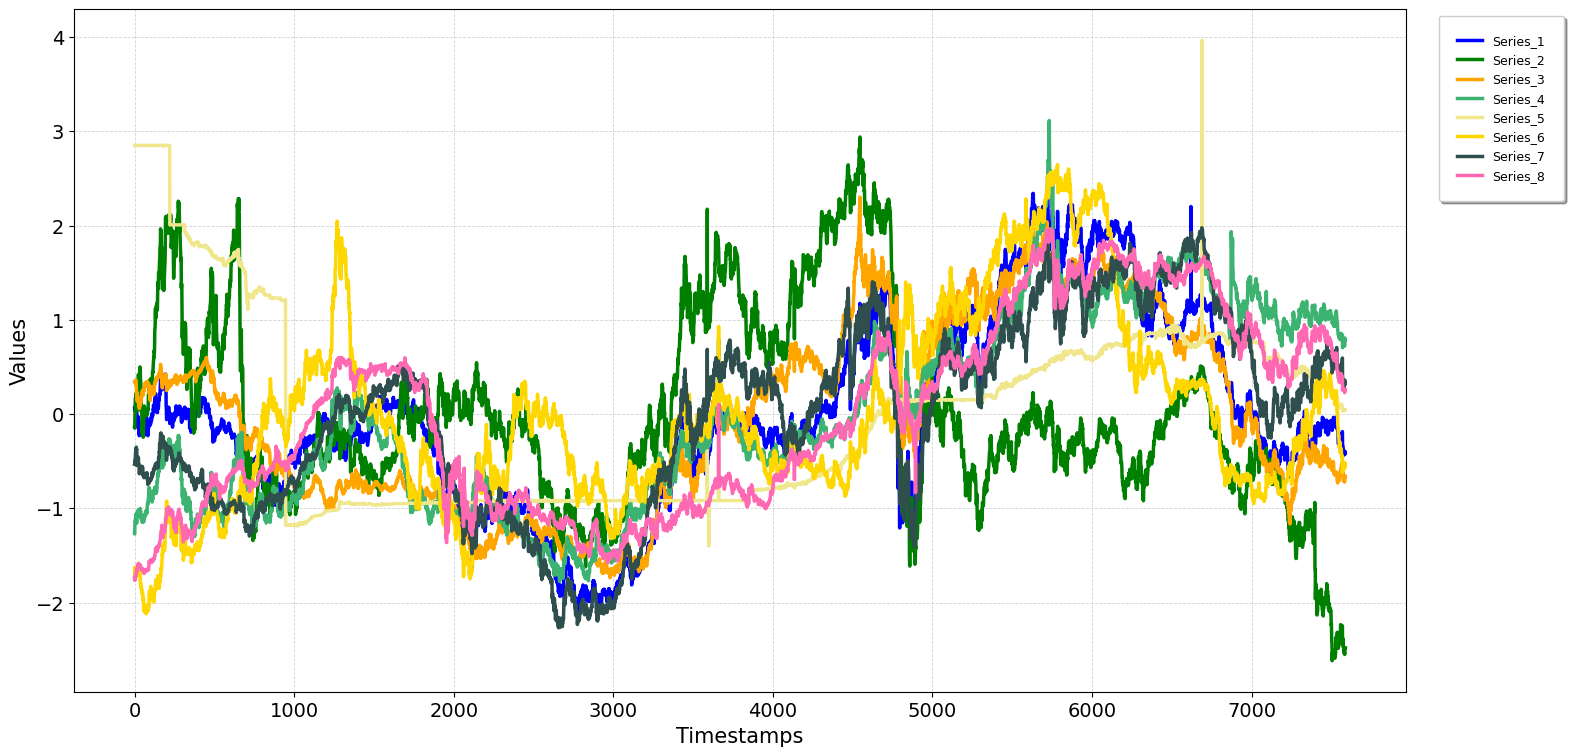

In [9]:
# load the dataset from the library
ts.load_series(utils.search_path("stock-exchange"))
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

The **Motion** dataset consists of time series data collected from accelerometer and gyroscope sensors, capturing attributes such as attitude, gravity, user acceleration, and rotation rate. Recorded at a high sampling rate of 50Hz using an iPhone 6s placed in users' front pockets, the data reflects various human activities.


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/motion.txt

> logs: normalization (z_score) of the data - runtime: 0.0035 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_31_imputegap_plot.jpg


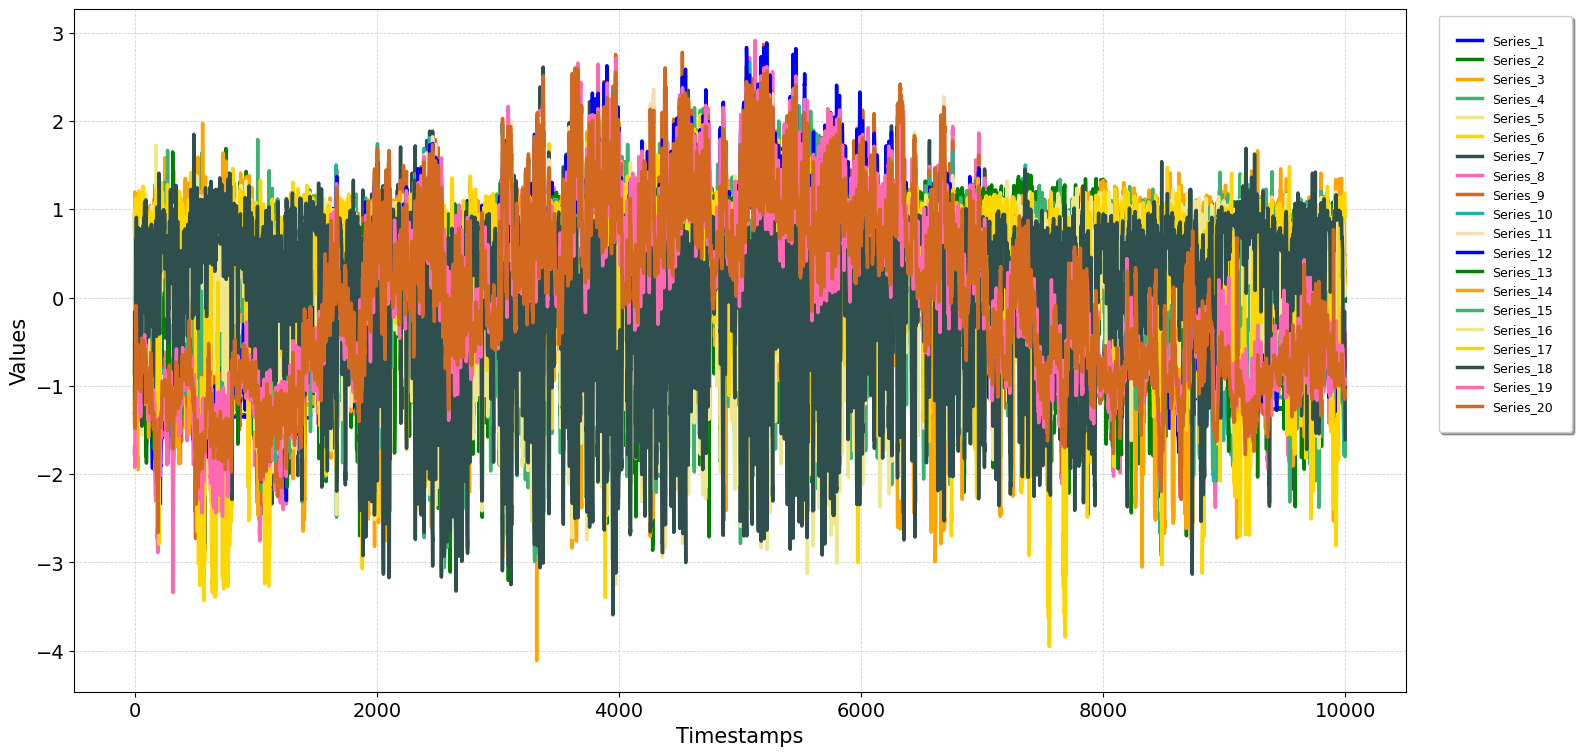

In [10]:
# load the dataset from the library
ts.load_series(utils.search_path("motion"))
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

The **Climate** dataset is an aggregated and processed collection used for climate change attribution studies. It contains observations data for 18 climate agents across 125 locations in North America USC Melady Lab. The dataset has a temporal granularity of 1 month, comprising 10 series with 5,000 values each. This structure is particularly valuable for spatio-temporal modeling Spatial-temporal causal modeling for climate change attribution, as it enables researchers to account for both spatial and temporal dependencies.


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/climate.txt

> logs: normalization (z_score) of the data - runtime: 0.0011 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_35_imputegap_plot.jpg


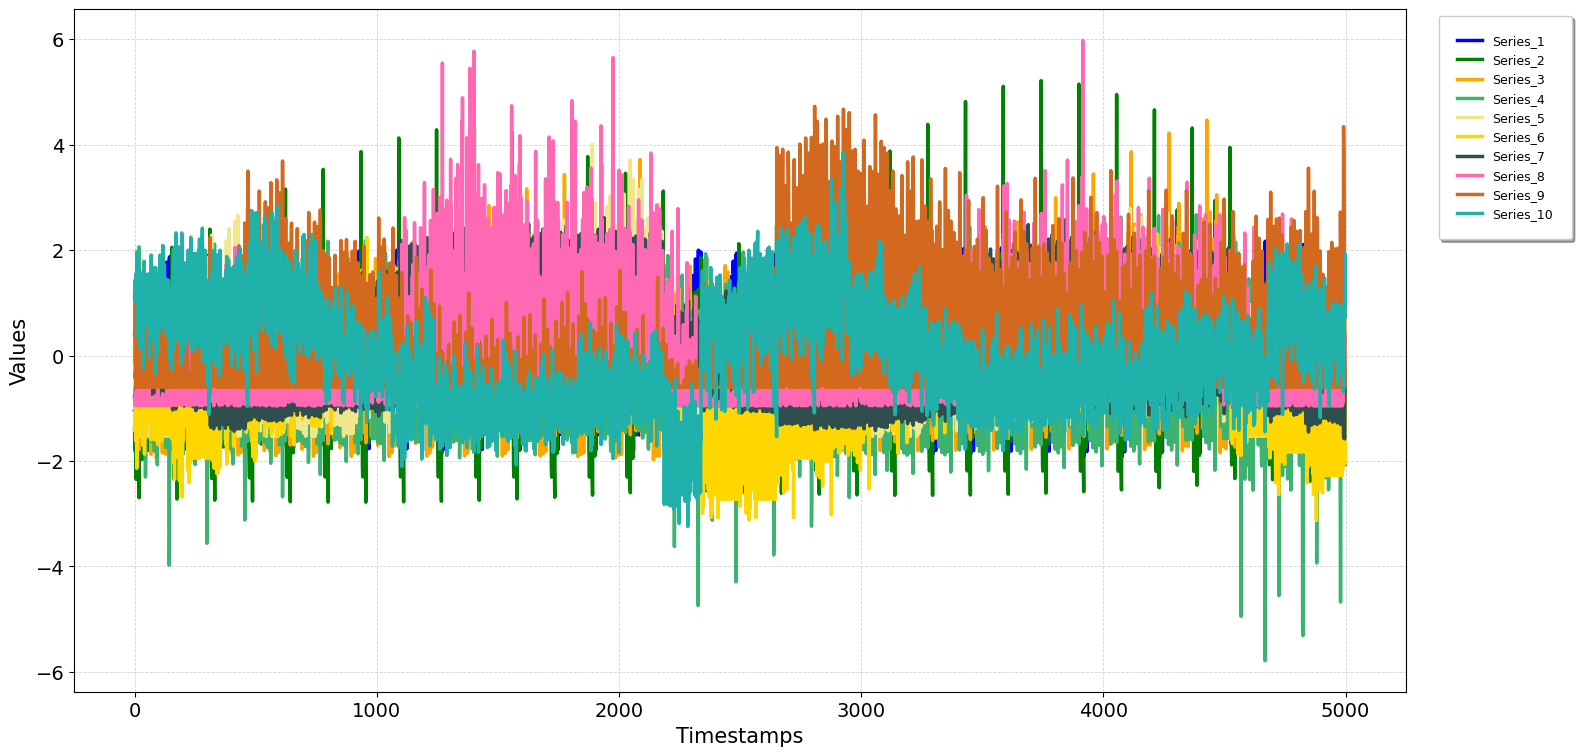

In [11]:
# load the dataset from the library
ts.load_series(utils.search_path("climate"))
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

The **Air Quality** dataset includes a subset of air quality measurements collected from 36 monitoring stations in China from 2014 to 2015.




(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/airq.txt

> logs: normalization (z_score) of the data - runtime: 0.0006 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_39_imputegap_plot.jpg


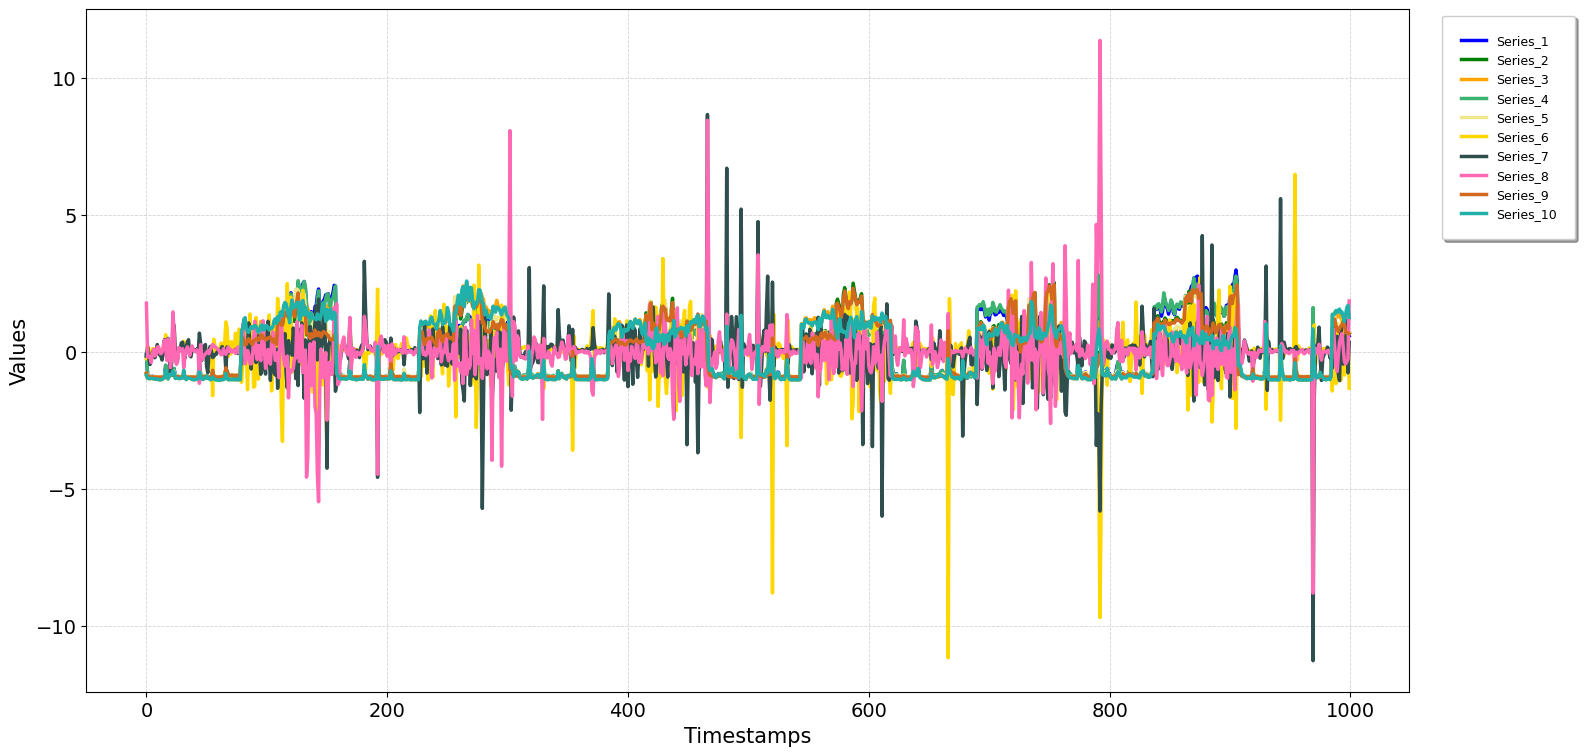

In [12]:
# load the dataset from the library
ts.load_series(utils.search_path("airq"))
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

The **BAFU** dataset, kindly provided by the BundesAmt Für Umwelt (the Swiss Federal Office for the Environment), contains water discharge time series collected from different Swiss rivers containing between 200k and 1.3 million values each and covers the time period from 1974 to 2015.


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/bafu.txt

> logs: normalization (z_score) of the data - runtime: 0.0187 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_44_imputegap_plot.jpg


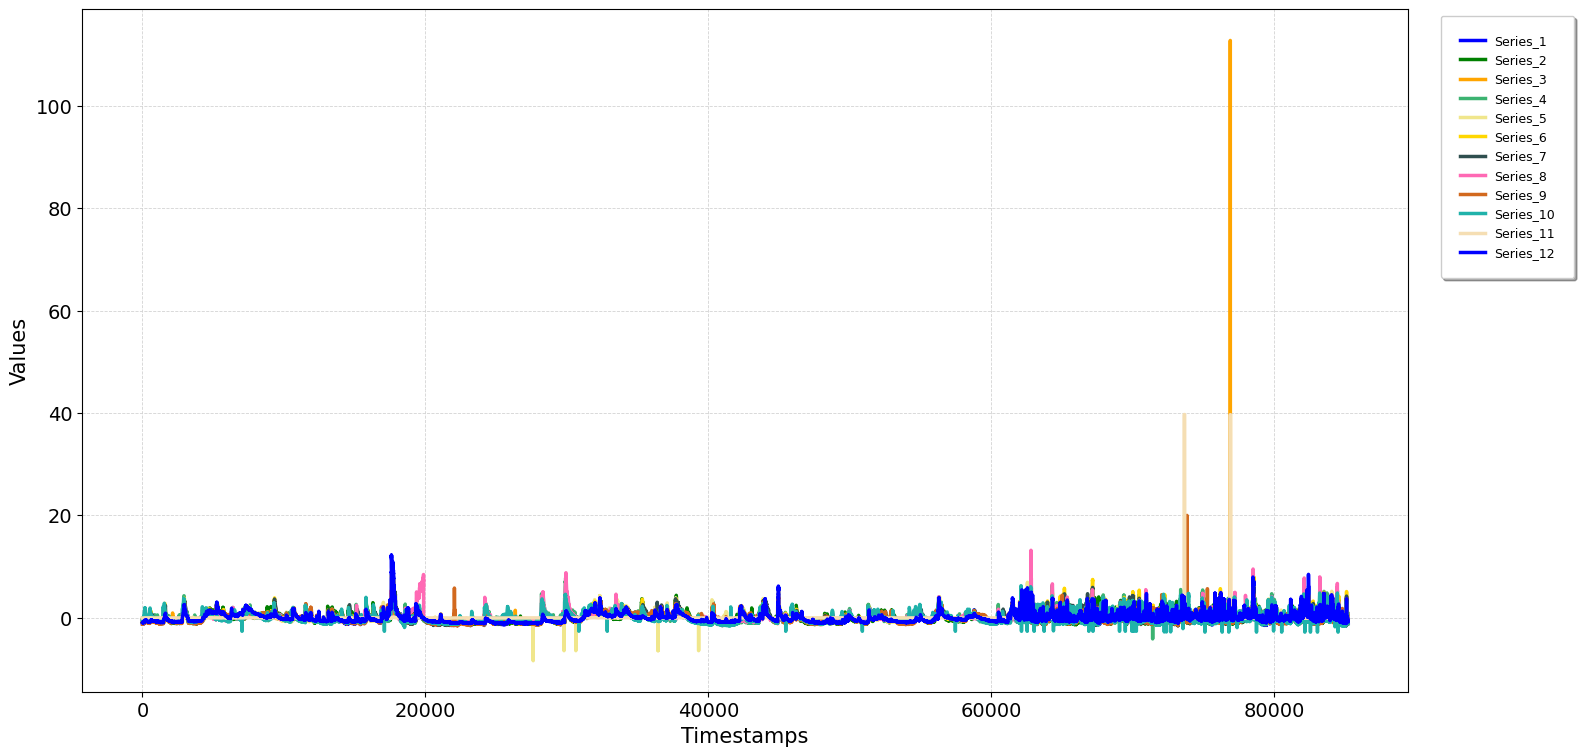

In [13]:
# load the dataset from the library
ts.load_series(utils.search_path("bafu"))
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

## 2.2&nbsp;Plotting Customization

The functions `print()` or `plot()`, provided by the manager object TimesSeries, allow to display numerically or visually the different time series.

In [14]:
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset from the library
ts.load_series(utils.search_path("bafu"))

# print a subset of time series
ts.print()


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/bafu.txt

> logs: normalization (z_score) of the data - runtime: 0.0174 seconds

shape of bafu : (85203, 12)
	number of series		= 12
	number of timestamps	= 85203

                  series_0       series_1       series_2       series_3       series_4       series_5       series_6       
timestamp_1      -1.1986480799  -0.9785036738  -0.1106393112  -0.4123336415  -0.8415498034  -0.7641010673  -0.8642578888
timestamp_2      -1.2022828591  -0.9823556731  -0.1090280722  -0.4123336415  -0.8415498034  -0.7520748095  -0.8665796950
timestamp_3      -1.1986480799  -0.9785036738  -0.1080613288  -0.4188661076  -0.8388987152  -0.7580879384  -0.8689015013
timestamp_4      -1.1986480799  -0.9785036738  -0.1077390811  -0.4188661076  -0.8442008915  -0.7661054436  -0.8712233075
timestamp_5      -1.1950133007  -

The `load_series` function allows to filter the number of series and the number of values of the time series. The same functionality can be used directly at the plotting level.


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/bafu.txt

> logs: normalization (z_score) of the data - runtime: 0.0172 seconds

plots saved in: ./imputegap_assets/26_01_22_15_49_59_imputegap_plot.jpg


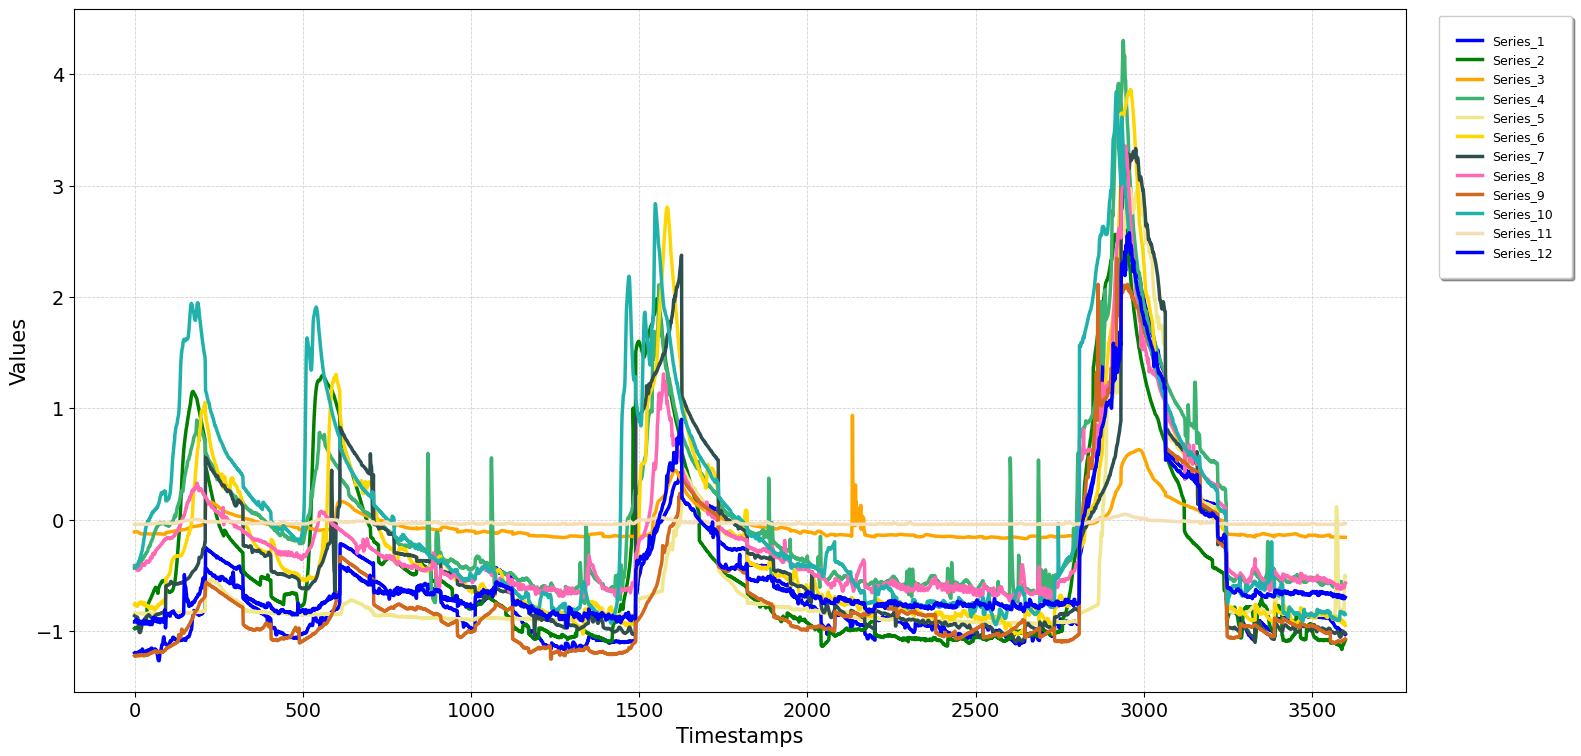

In [15]:
# load and normalize the dataset from the library
ts.load_series(utils.search_path("bafu"))
ts.plot(input_data=ts.data, nbr_val=3600, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/bafu.txt

> logs: normalization (z_score) of the data - runtime: 0.0269 seconds

plots saved in: ./imputegap_assets/26_01_22_15_50_04_imputegap_plot.jpg


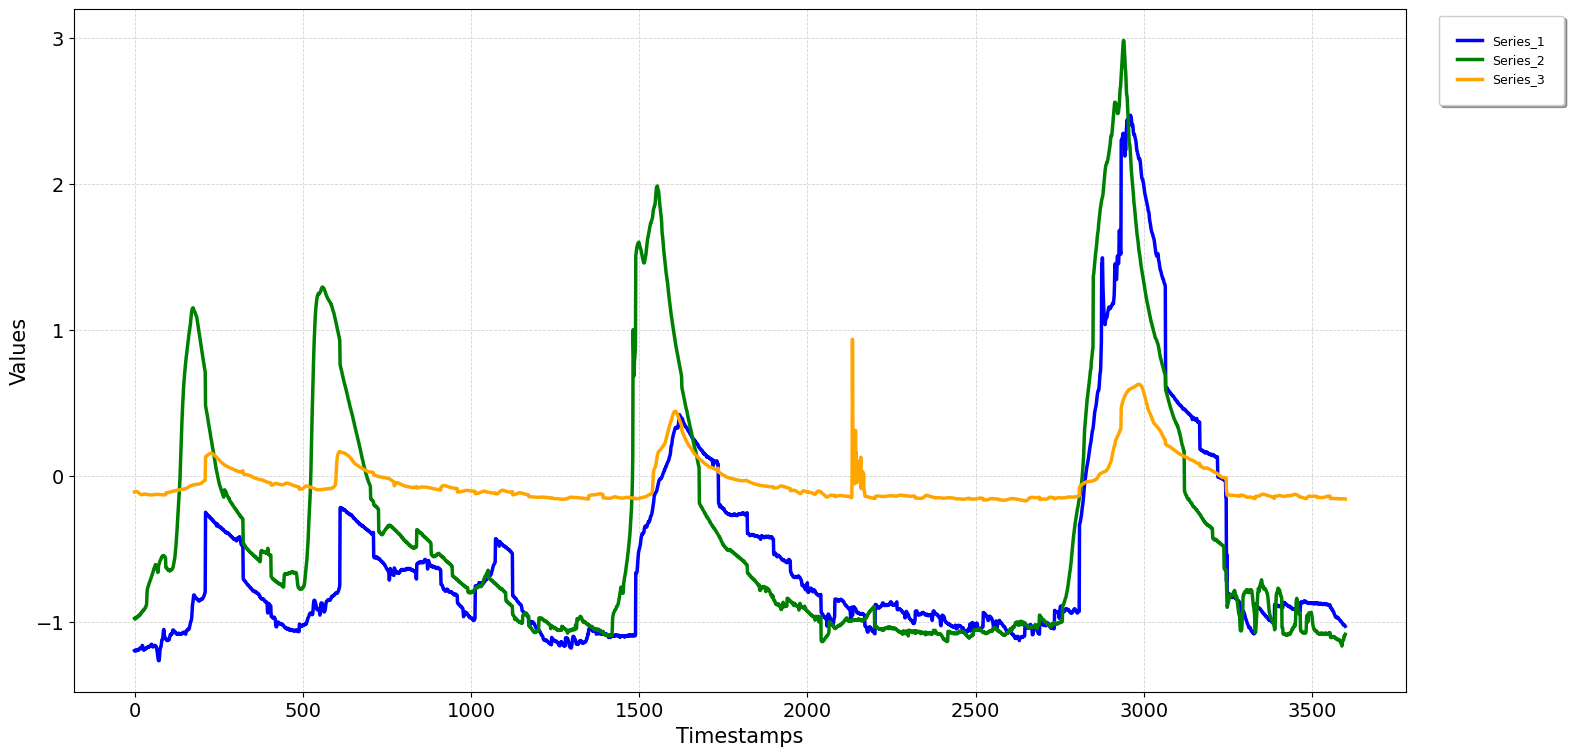

In [16]:
# load the BAFU dataset from the library
ts.load_series(utils.search_path("bafu"))
ts.plot(input_data=ts.data, nbr_series=3, nbr_val=3600, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

## 2.3&nbsp;Load as a Matrix

To import the time series as a matrix, add it to the ``ts.import_matrix`` function:

In [17]:
from imputegap.recovery.manager import TimeSeries
ts = TimeSeries()
mat = [[2,3,9], [3,10,5], [-1,4,5], [0,0,0]]
ts.import_matrix(mat)

imputegap_jupyter(ts.data)


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)




plots saved in: ./imputegap_assets/26_01_22_15_50_10_imputegap_plot.jpg


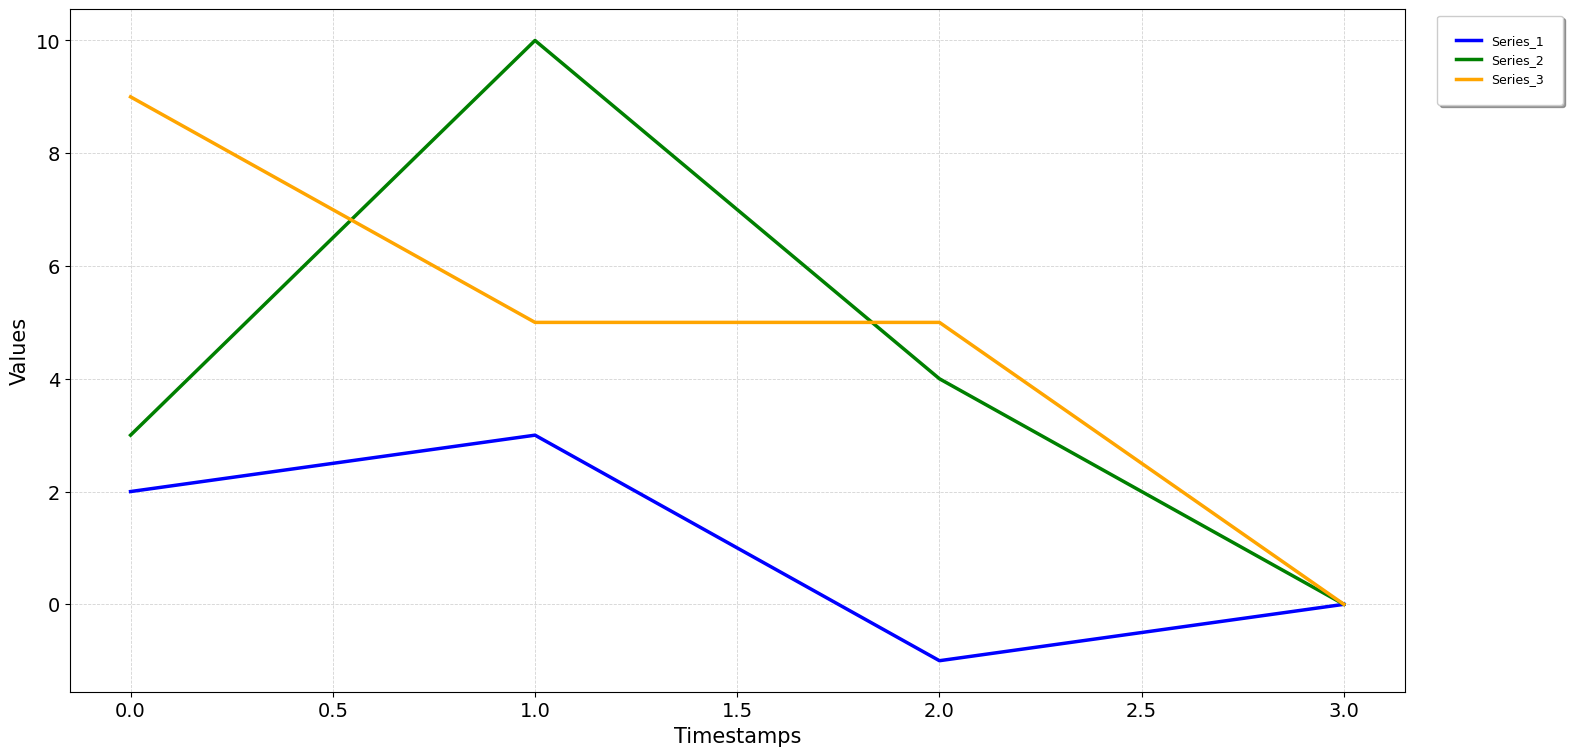

In [18]:
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

## 2.4&nbsp;Load External Datasets

To load your own dataset, add the path to your file in the ``ts.load_series`` function:

In [20]:
from imputegap.recovery.manager import TimeSeries
ts = TimeSeries()
ts.load_series("test.txt")  # PATH of your dataset

imputegap_jupyter(ts.data)


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/test.txt

> logs: normalization (z_score) of the data - runtime: 0.0004 seconds



plots saved in: ./imputegap_assets/26_01_22_15_50_26_imputegap_plot.jpg


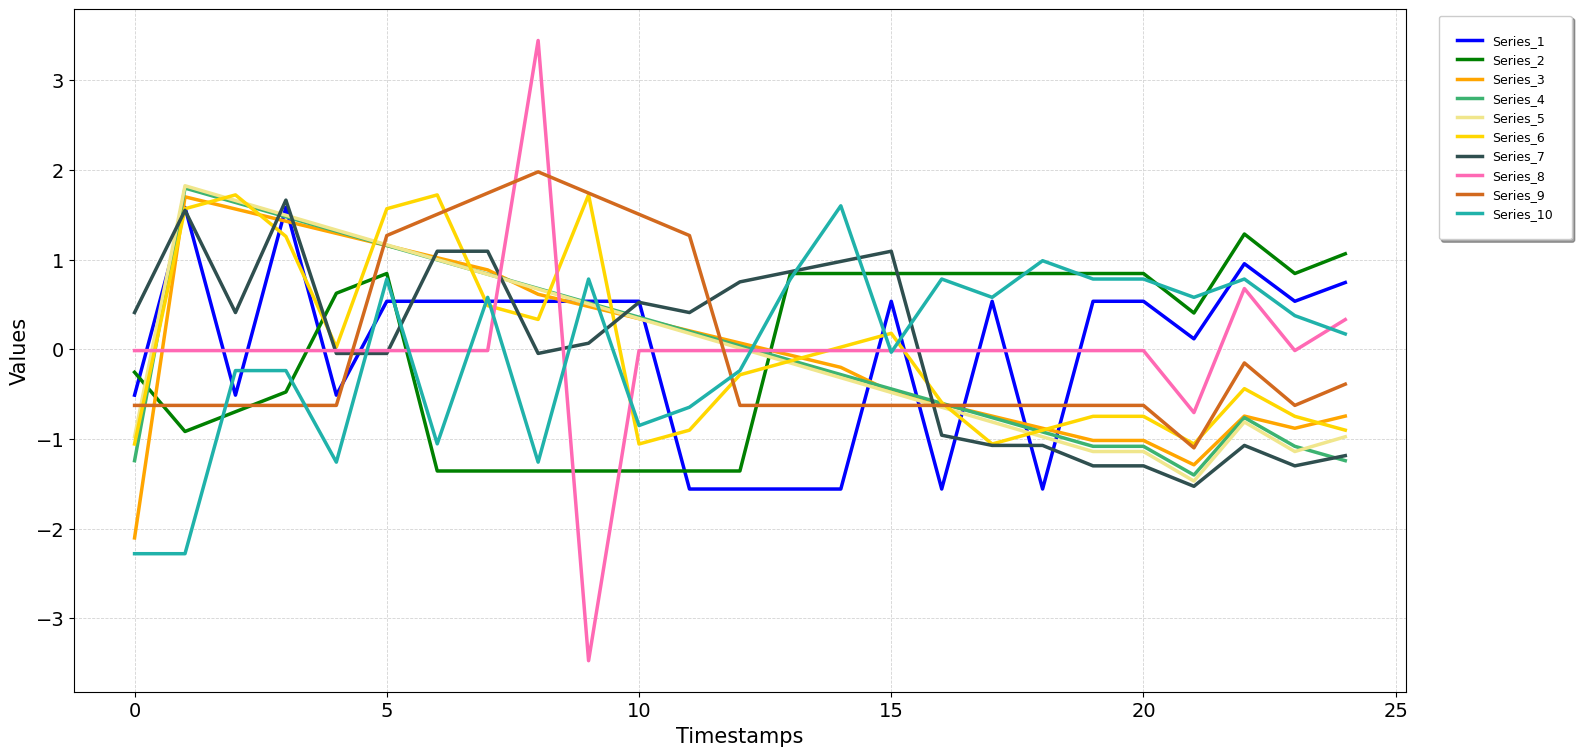

In [21]:
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

## 2.5&nbsp;Data Preprocessing


The time series datasets can be normalized before being used. This step can have a drastic impact on the performance of some imputation algorithms.


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/bafu.txt

> logs: normalization (z_score) of the data - runtime: 0.0011 seconds
> logs: normalization (z_score) of the data - runtime: 0.0005 seconds

plots saved in: ./imputegap_assets/26_01_22_15_50_30_imputegap_plot.jpg


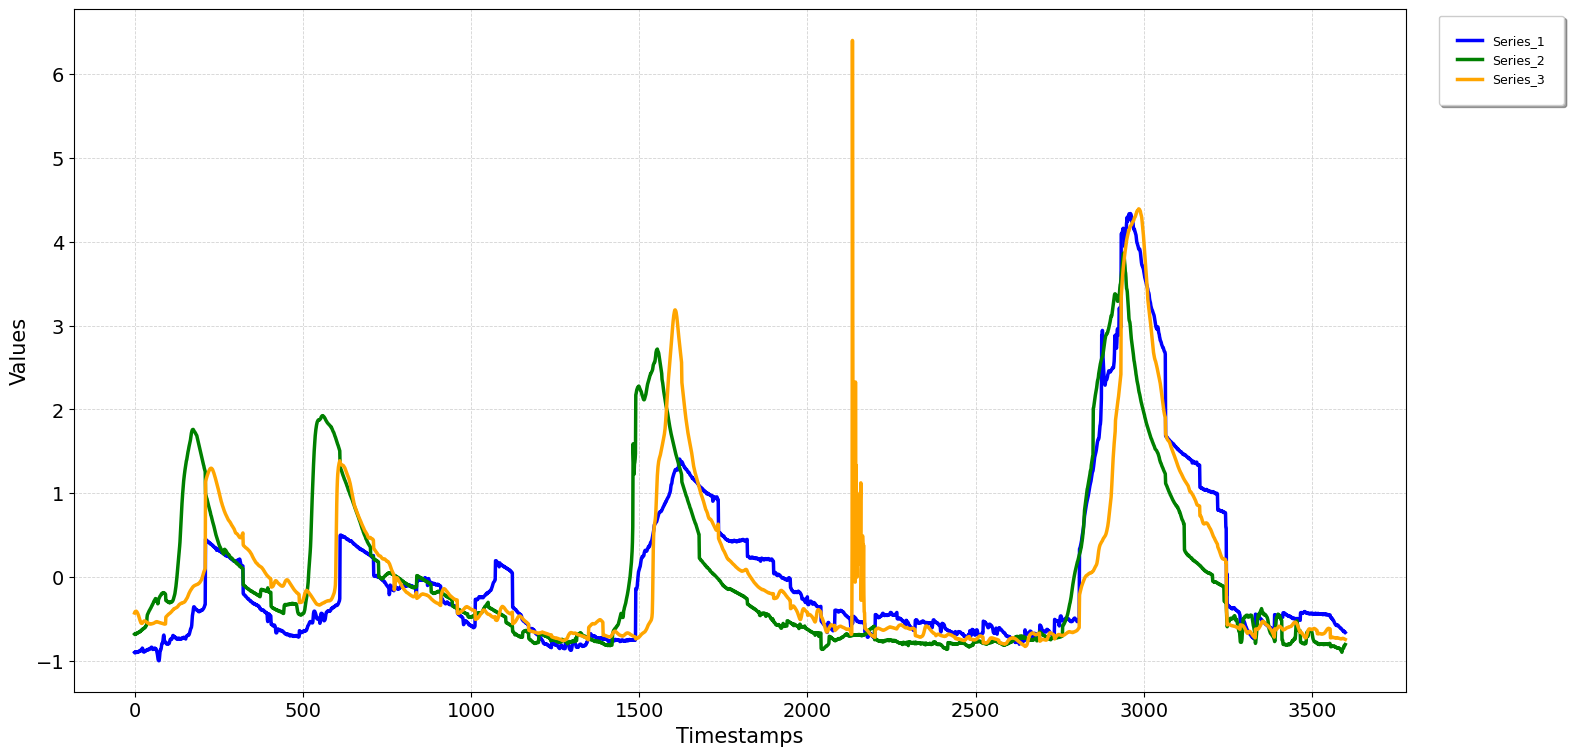

In [22]:
# load and normalize the dataset from the library
ts.load_series(utils.search_path("bafu"), nbr_series=3, nbr_val=3600)
ts.normalize(normalizer="z_score")
ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

Extend your normalizer to your implementation or any APIs such as sklearn


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/bafu.txt

> logs: normalization (z_score) of the data - runtime: 0.0009 seconds

plots saved in: ./imputegap_assets/26_01_22_15_50_34_imputegap_plot.jpg


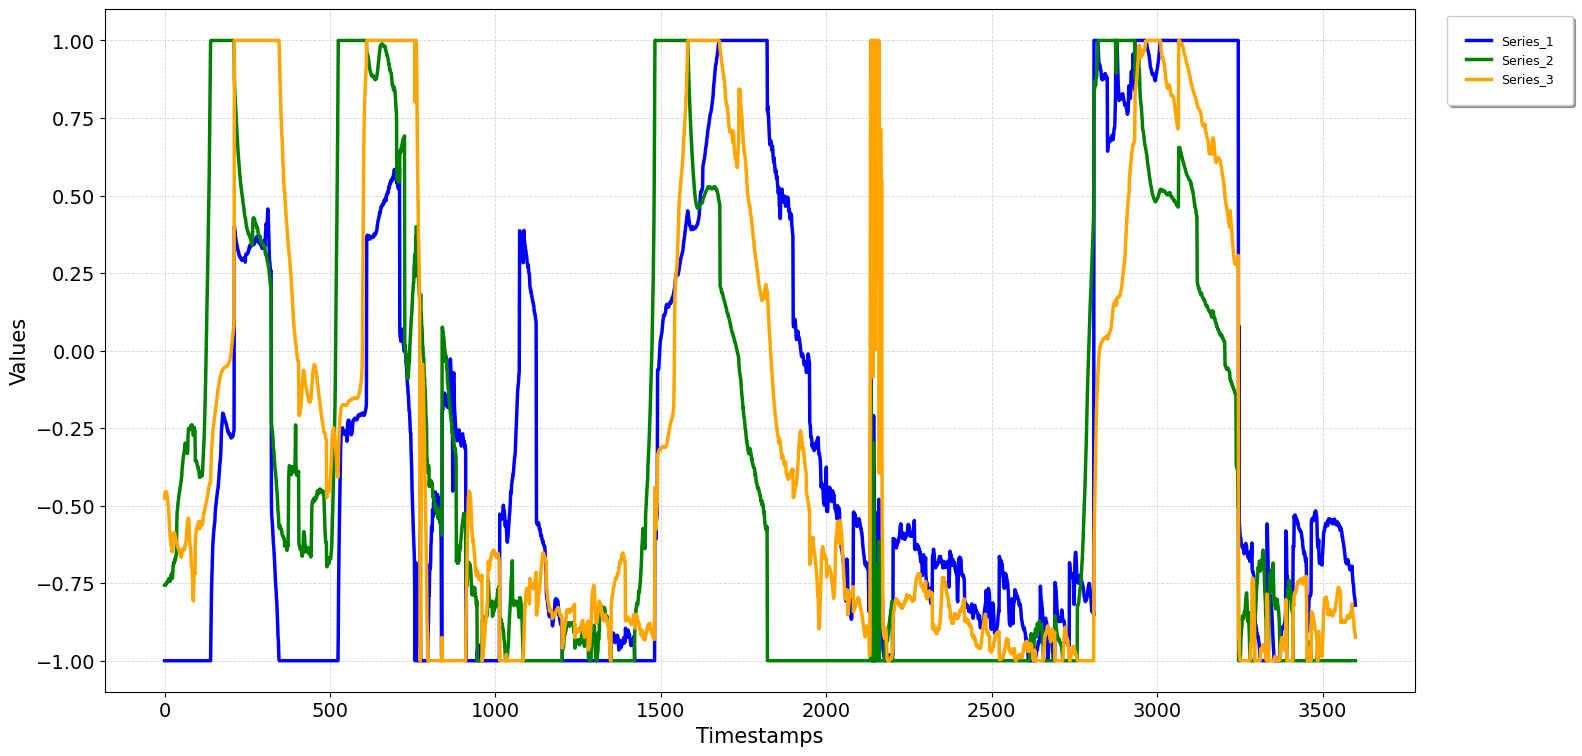

In [23]:
from sklearn.preprocessing import maxabs_scale

ts = TimeSeries()
ts.load_series(utils.search_path("bafu"), nbr_series=3, nbr_val=3600)

ts.data = maxabs_scale(ts.data, axis=1)

ts.plot(input_data=ts.data, save_path="./imputegap_assets")
%matplotlib inline
ts.plots.show()

<br>


# 3.&nbsp;Synthetic Missing Data Injection

We now describe how to simulate missing values in the loaded dataset. ImputeGAP implements seven different missingness patterns. We will illustrate how to contaminate the BAFU dataset with each of those missigness patterns:

All the patterns are available in the ``ts.patterns`` module. They can be listed as follows:

In [24]:
ts.patterns

['aligned',
 'disjoint',
 'distribution',
 'gaussian',
 'mcar',
 'overlap',
 'scattered']

## 3.1&nbsp;MCAR Pattern

The MCAR (Missing Completely At Random) pattern introduces missing value blocks of a specified size at random positions across multiple series, continuing until the user-defined missing value percentage is met. The MCAR pattern can be simulated as follows:

In [38]:
def clean_display(ts):
    ts.shift(1, 4)
    ts.shift(2, -4)
    ts.range(3500, 7000)
    ts.data = ts.data[:, [2, 0, 1]]
    return ts

In [46]:
from imputegap.recovery.manager import TimeSeries
from imputegap.recovery.contamination import GenGap
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the dataset
ts.load_series(utils.search_path("eeg-alcohol"), normalizer="z-score", nbr_val=250, nbr_series=3)
ts = clean_display(ts)

# contaminate the time series with MCAR pattern
ts_m = GenGap.mcar(ts.data, rate_dataset=1, rate_series=0.2, block_size=10, offset=25, seed=True)


ImputeGAP Library has been invoked (https://github.com/eXascaleInfolab/ImputeGAP)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/eeg-alcohol.txt

> logs: normalization (z_score) of the data - runtime: 0.0003 seconds
(SYS) Time series 1 data as been shift by: 4
(SYS) Time series 2 data as been shift by: -4
(ERR) The series 7000 has no data.

(CONT) missigness pattern: MCAR
	selected series: 1, 2, 3
	percentage of contaminated series: 100%
	rate of missing data per series: 20.0%
	block size: 10
	security offset: [0-25]
	seed value: 42



<br>


In [47]:
imputegap_jupyter(ts_m)

<br>



plots saved in: ./imputegap_assets/contamination/26_01_22_15_58_10_imputegap_plot.jpg


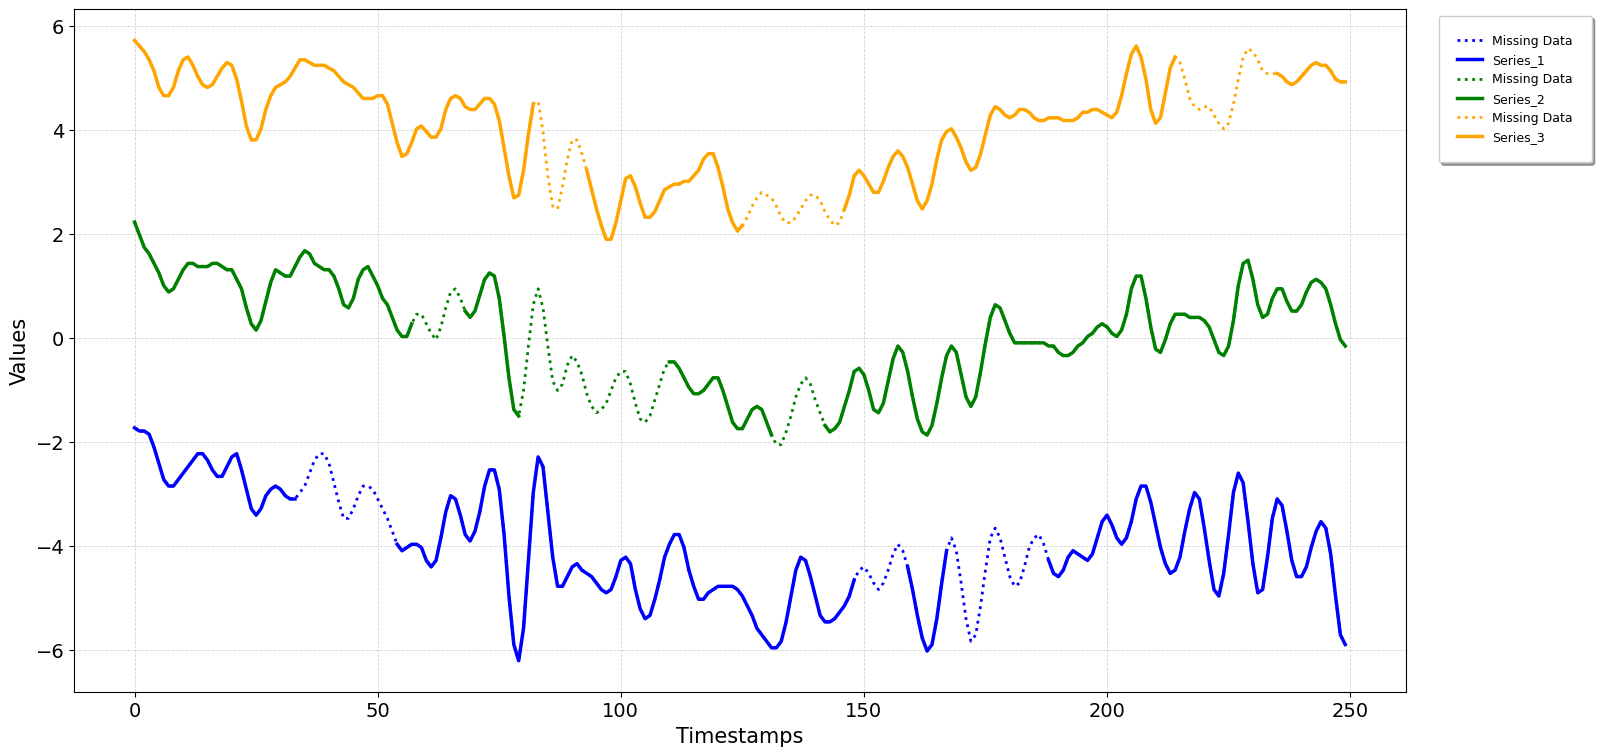

In [48]:
ts.plot(ts.data, ts_m, nbr_series=4, subplot=False, save_path="./imputegap_assets/contamination")
%matplotlib inline
ts.plots.show()

 ## 3.2&nbsp;Distribution Pattern

Now, we will simulate missing blocks that a follow a statistical distribution. We will ilustrate the contamination using a Gaussian distribution.


(CONT) missigness pattern: GAUSSIAN
	percentage of contaminated series: 100%
	rate of missing data per series: 40.0%
	security offset: [0-25]
	seed value: 42
	mean strategy : position
	standard deviation : 0.2


plots saved in: ./imputegap_assets/contamination/26_01_22_15_58_36_imputegap_plot.jpg


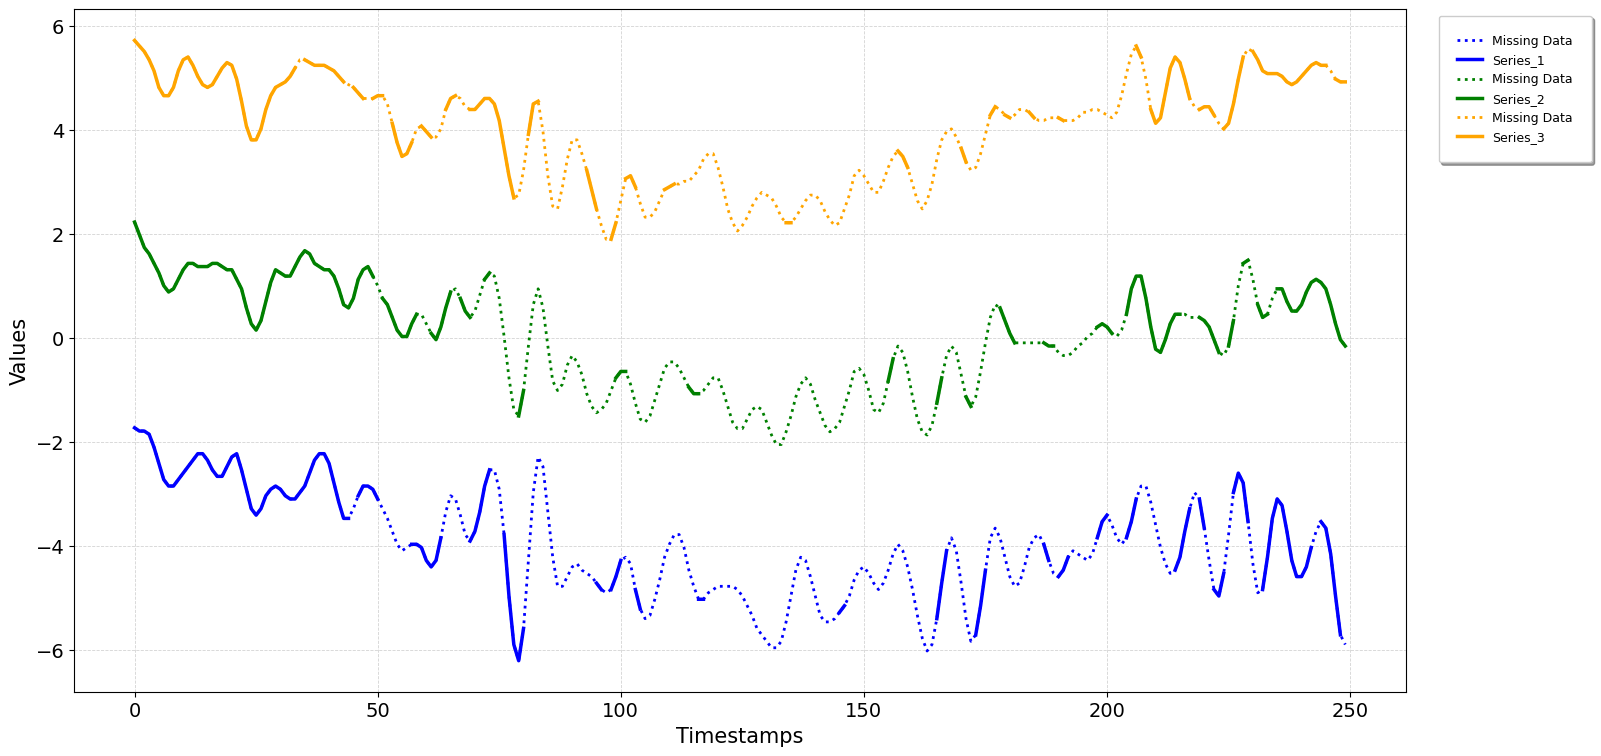

In [49]:
ts_m = GenGap.gaussian(ts.data, rate_dataset=1, rate_series=0.4, offset=25, std_dev=0.2)

ts.plot(ts.data, ts_m, nbr_series=4, subplot=False, save_path="./imputegap_assets/contamination")
%matplotlib inline
ts.plots.show()

## 3.3&nbsp;Aligned Pattern

The aligned pattern introduces a single large block of missing values into the series, with its size determined by the series rate. The missing block begins after an offset to prevent failures in certain imputation algorithms. The aligned pattern can be simulated as follows:


(CONT) missigness pattern: ALIGNED
	percentage of contaminated series: 100%
	rate of missing data per series: 40.0%
	security offset: [0-25]
	timestamps impacted : 25 -> 124
	series impacted : 0 -> 2


plots saved in: ./imputegap_assets/contamination/26_01_22_15_58_48_imputegap_plot.jpg


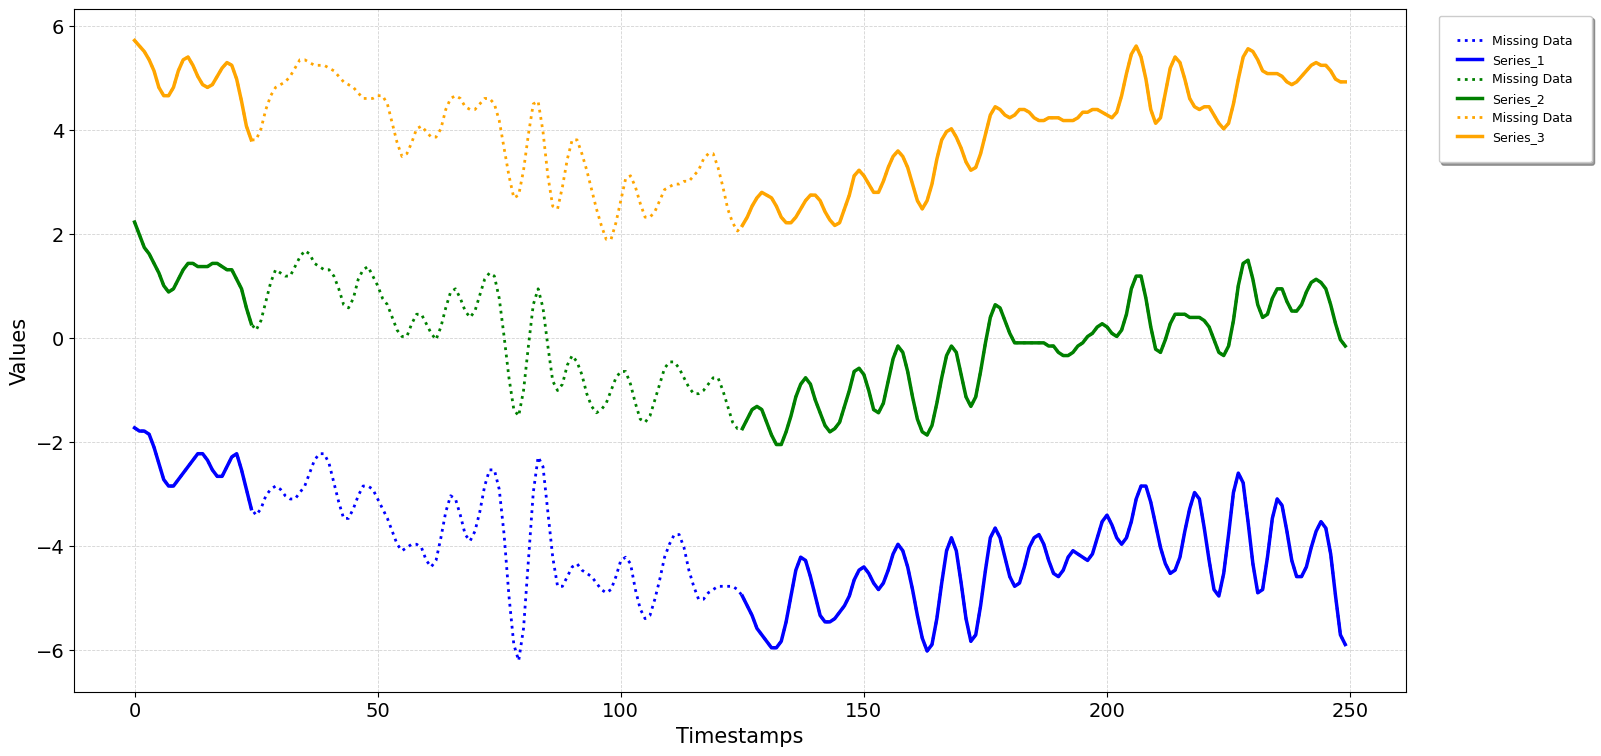

In [50]:
ts_m = GenGap.aligned(ts.data, rate_dataset=1, rate_series=0.4, offset=25)

ts.plot(ts.data, ts_m, nbr_series=4, subplot=False, save_path="./imputegap_assets/contamination")
%matplotlib inline
ts.plots.show()

## 3.4&nbsp;Scattered Pattern

The scattered pattern follows the same intuition as the aligned pattern, with the exception that its starting position is randomly defined for each contaminated series. The pattern can be simulated as follows:


(CONT) missigness pattern: SCATTER
	percentage of contaminated series: 100%
	rate of missing data per series: 40.0%
	security offset: [0-25]
	index impacted : 25 -> 125


plots saved in: ./imputegap_assets/contamination/26_01_22_15_59_01_imputegap_plot.jpg


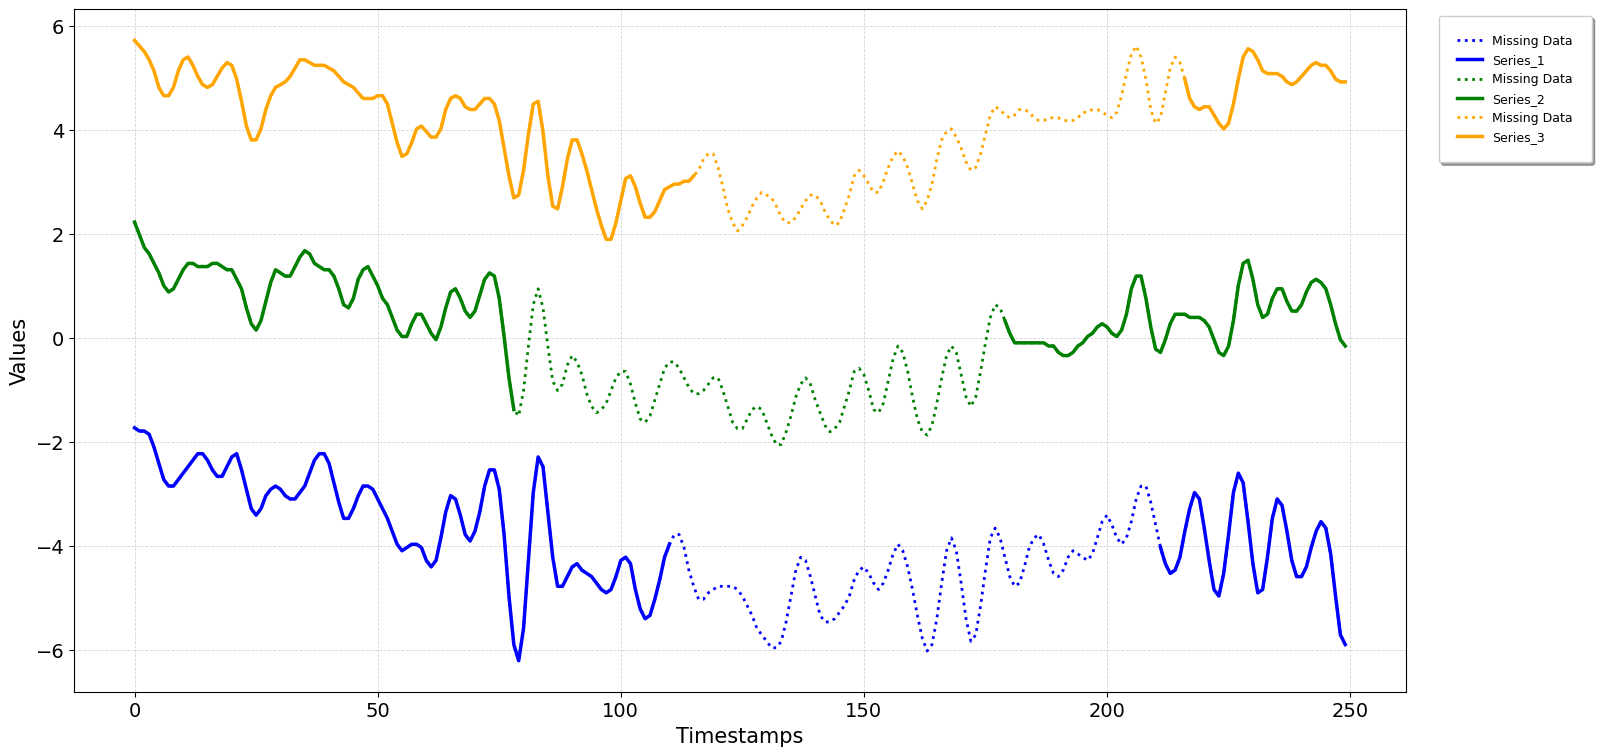

In [51]:
ts_m = GenGap.scattered(ts.data, rate_dataset=1, rate_series=0.4, offset=25)

ts.plot(ts.data, ts_m, nbr_series=4, subplot=False, save_path="./imputegap_assets/contamination")
%matplotlib inline
ts.plots.show()

## 3.5&nbsp;Disjoint Pattern

In the disjoint pattern, each series is contaminated with a specified size, and the starting point of the contamination is determined by where the previous series’ contamination ends. Disjoint simulation can be made as follows:


(CONT) missigness pattern: DISJOINT
	percentage of contaminated series: 40.0%
	rate of missing data per series: 40.0%
	security offset: [0-25]
	limit: 1


plots saved in: ./imputegap_assets/contamination/26_01_22_15_59_15_imputegap_plot.jpg


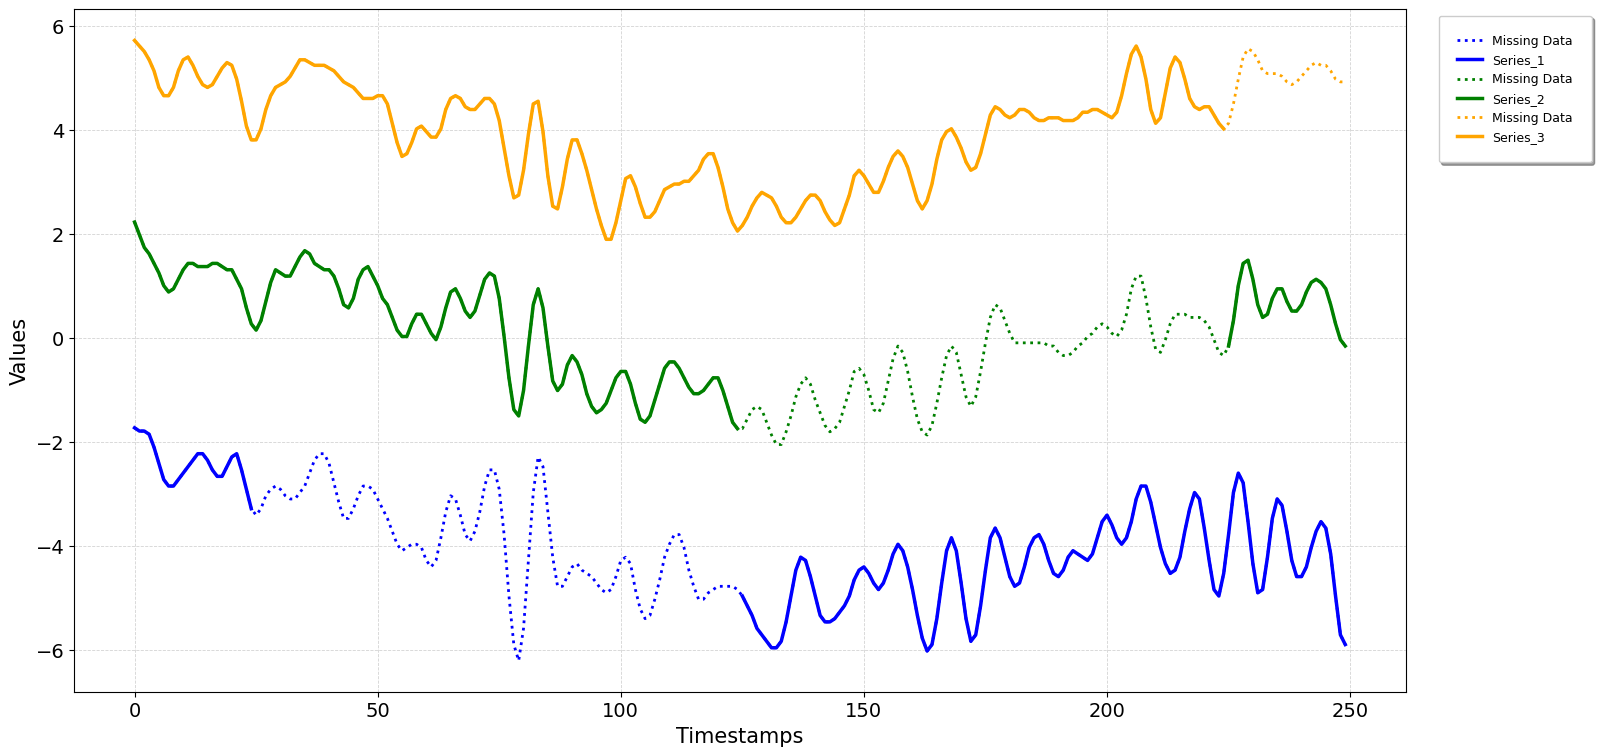

In [52]:
ts_m = GenGap.disjoint(ts.data, rate_series=0.4, offset=25)

ts.plot(ts.data, ts_m, nbr_series=4, subplot=False, save_path="./imputegap_assets/contamination")
%matplotlib inline
ts.plots.show()

## 3.6&nbsp;Overlap Pattern

The overlap pattern follows the same intuition as the disjoint one with the exception that the starting position of each series will be shifted by a specific percentage. The overlap pattern can be simulated as follows:


(CONT) missigness pattern: OVERLAP
	percentage of contaminated series: 40.0%
	rate of missing data per series: 40.0%
	security offset: [0-25]
	shift: 10.0 %
	limit: 1


plots saved in: ./imputegap_assets/contamination/26_01_22_15_59_49_imputegap_plot.jpg


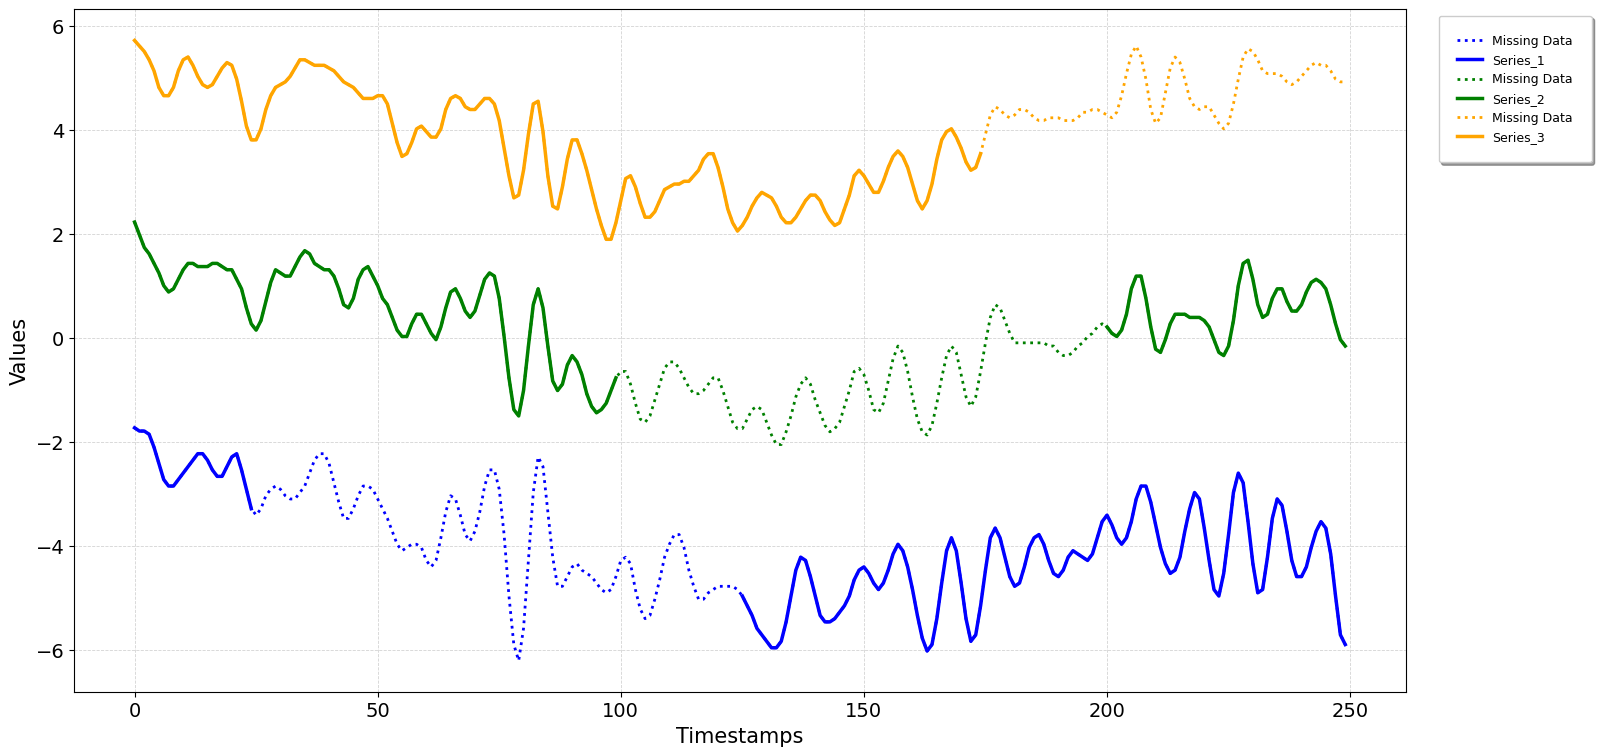

In [55]:
ts_m = GenGap.overlap(ts.data, rate_series=0.4, offset=0.1, shift=0.1)

ts.plot(ts.data, ts_m, nbr_series=4, subplot=False, save_path="./imputegap_assets/contamination")
%matplotlib inline
ts.plots.show()

<br>


<br>
More KDD tutorials: https://imputegap-tutorials.github.io/KDD-2025/html/slides_codes.html